In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ipyleaflet import Map, Heatmap

In [2]:
data = pd.read_csv('.\dataDrivers\PQR_bog_prueba_2022_01_10.csv')

C:\Users\User\Documents\frubana\pruebas\timeChange\env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (14,15,16,17,24,25,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
revenue_routes = [
    '.\dataDrivers\Revenue_Gap_CO_ALQ_Prueba_2022_01_08.csv',
    '.\dataDrivers\Revenue_Gap_CO_PA_Prueba_2022_01_08.csv',
    '.\dataDrivers\Revenue_Gap_CO_SIB_Prueba_2022_01_08.csv',
]

In [4]:
revenue_types ={
    'close_date': 'string',
    'tracking_code': 'string',
    'ticket_name': 'string',
    'fecha_ticket': 'string',
     'region_code': 'string',
     'warehouse': 'string',
     'tickets': 'int64',
     'programado_op': 'float64',
     'entregado_op': 'float64',
     'gap_gmv_op': 'float64',
     'stop_id': 'string',
     'driver_id': 'string',
     'tag_name': 'string',
     'check_in': 'string',
     'check_out': 'string',
     'check_in_latitude': 'float64',
     'check_in_longitude': 'float64',
     'check_out_latitude': 'float64',
     'check_out_longitude': 'float64'}

In [5]:
revenue = []
for route in revenue_routes:
    revenue.append(pd.read_csv(route, dtype=revenue_types))

revenue_df = pd.concat(revenue)

In [6]:
#Correct data type
data['close_date'] = pd.to_datetime(data['close_date'])
data['check_in_original'] = pd.to_datetime(data['check_in_original'])
data['check_in'] = pd.to_datetime(data['check_in'])

revenue_df['close_date'] = pd.to_datetime(revenue_df['close_date'])
revenue_df['fecha_ticket'] = pd.to_datetime(revenue_df['fecha_ticket'])
revenue_df['check_in'] = pd.to_datetime(revenue_df['check_in'])
revenue_df['check_out'] = pd.to_datetime(revenue_df['check_out'])

In [7]:
resume = data.groupby(['name'])['tag_name'].nunique().sort_values(ascending=False).reset_index()

In [8]:
resume['percentage'] = resume['tag_name']/resume['tag_name'].sum() * 100
resume['acum'] = resume['percentage'].cumsum()
resume

,name,tag_name,percentage,acum
0,Faltante total,13146,19.576192,19.576192
1,Faltante parcial,6933,10.324185,29.900377
2,Sin Contacto,6021,8.966092,38.866469
3,Cliente no necesita el producto,5977,8.900570,47.767039
4,Cancelación por Cliente,4213,6.273733,54.040773
5,Calidad Sanidad,4174,6.215657,60.256429
6,Calidad Estándar,2914,4.339344,64.595774
7,Tecnología,2702,4.023647,68.619421
8,Producto Errado,2540,3.782407,72.401829
9,Atención del conductor,2372,3.532232,75.934061


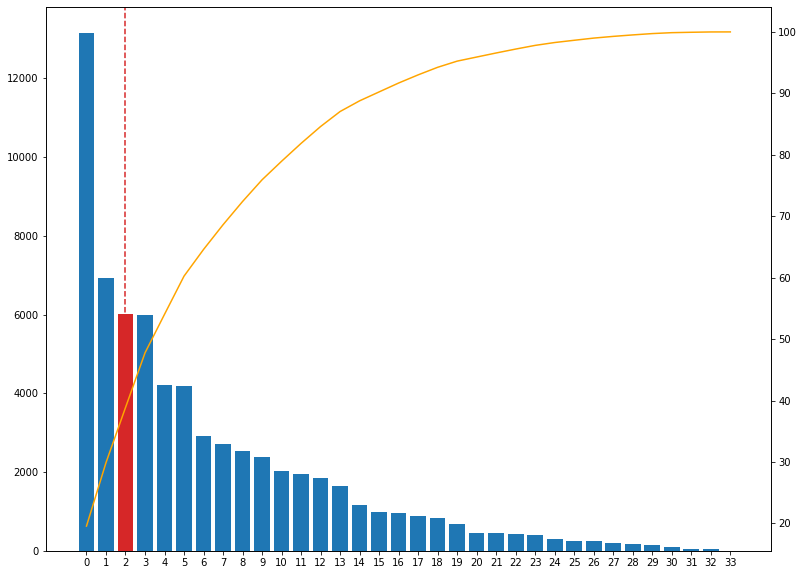

In [9]:
color_bars = ['tab:blue' if ind!= 2 else 'tab:red' for ind in resume.index ]
fig, ax = plt.subplots(figsize=(13,10))
ax.bar(resume.index, resume.iloc[:,1], color=color_bars)
ax.axvline(x=2, color='tab:red', linestyle='--')
ax2 = ax.twinx()
ax2.plot(resume.index, resume['acum'], color='orange')
ax.set_xticks(resume.index)

In [10]:
revenue_df = revenue_df[(revenue_df['close_date'] < '2022-01-08') & (revenue_df['close_date'] > '2021-07')]

In [11]:
revenue_df['ticket_root'] =  revenue_df['tracking_code'].apply(lambda x: x.split('_')[0])
time_revenue = revenue_df.groupby(['close_date'])['ticket_root'].nunique().reset_index()

Text(0, 0.5, 'Number clients')

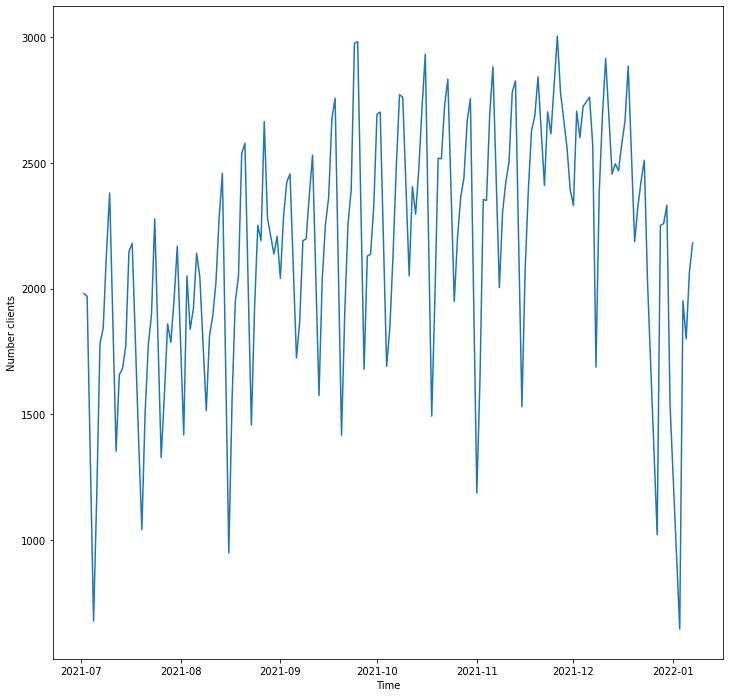

In [12]:
fig, ax = plt.subplots(figsize=(12,12 ))
ax.plot(time_revenue['close_date'], time_revenue['ticket_root'])
ax.set_xlabel('Time')
ax.set_ylabel('Number clients')

## split the data 

In [13]:
time_pqr = data.groupby(['close_date'])['tag_name'].nunique().reset_index()
time_sc = data[data['name']=='Sin Contacto'].groupby(['close_date'])['tag_name'].nunique().reset_index()

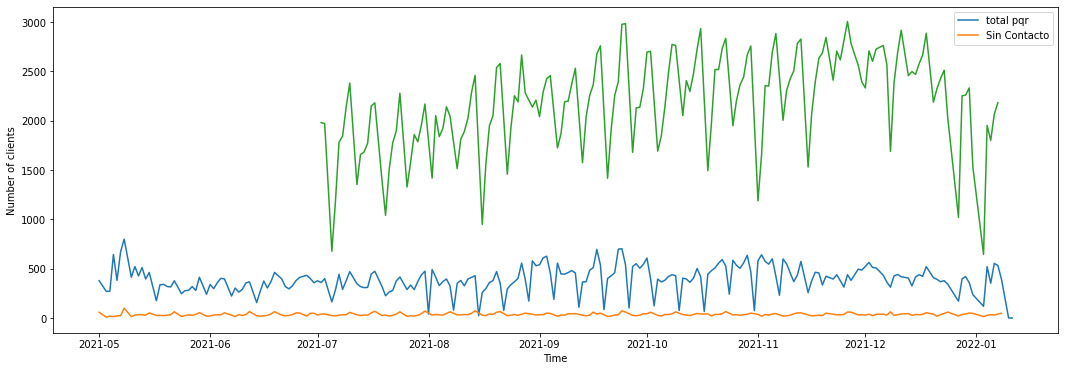

In [14]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(time_pqr['close_date'], time_pqr.iloc[:,1],  label='total pqr')
ax.plot(time_sc['close_date'], time_sc.iloc[:,1], label='Sin Contacto')
ax.plot(time_revenue['close_date'], time_revenue['ticket_root'])
ax.set_xlabel('Time')
ax.set_ylabel('Number of clients')
ax.legend()

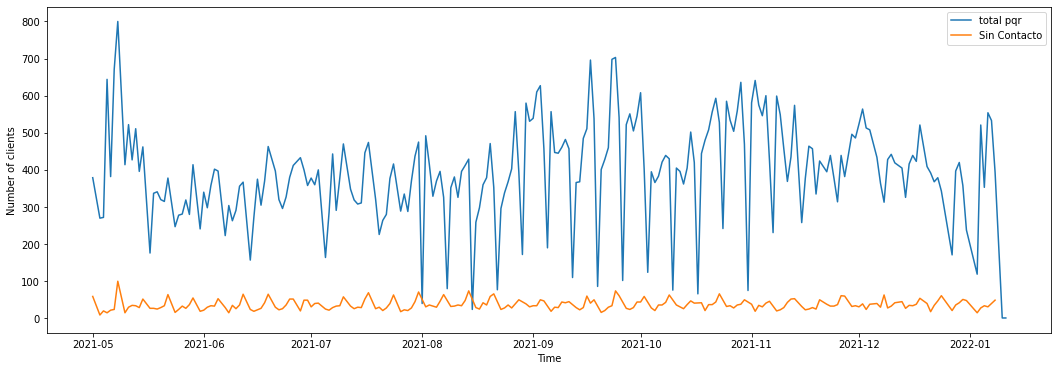

In [15]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(time_pqr['close_date'], time_pqr.iloc[:,1],  label='total pqr')
ax.plot(time_sc['close_date'], time_sc.iloc[:,1], label='Sin Contacto')

ax.set_xlabel('Time')
ax.set_ylabel('Number of clients')
ax.legend()

Text(0, 0.5, 'Number of clients')

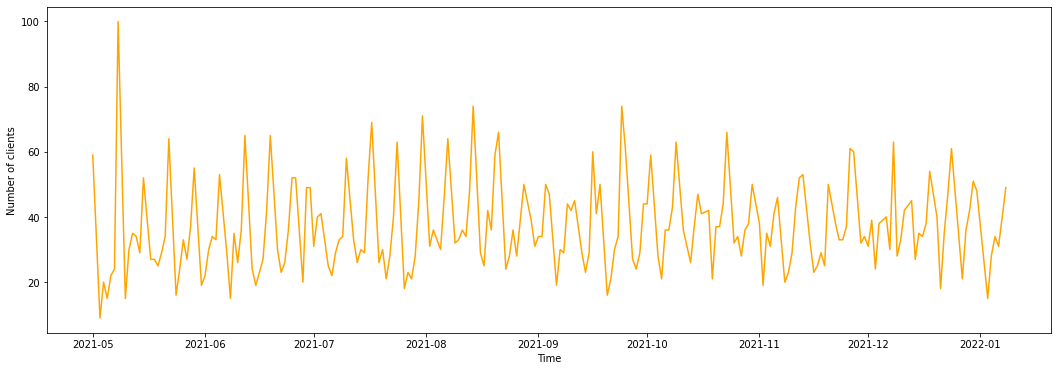

In [16]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(time_sc['close_date'], time_sc.iloc[:,1], color='orange',  label='Sin Contacto')


ax.set_xlabel('Time')
ax.set_ylabel('Number of clients')

In [17]:
relations = time_pqr.merge(time_sc, on='close_date', how='left').merge(time_revenue, on='close_date', how='left')
relations = relations.rename(columns={'tag_name_x':'total_pqrs', 'tag_name_y':'Sin Contacto', 'ticket_root':'total_clients'})

In [18]:
relations['clients_pqrs'] = relations['total_pqrs']/relations['total_clients']
relations['pqrs_sc'] = relations['Sin Contacto']/relations['total_clients']

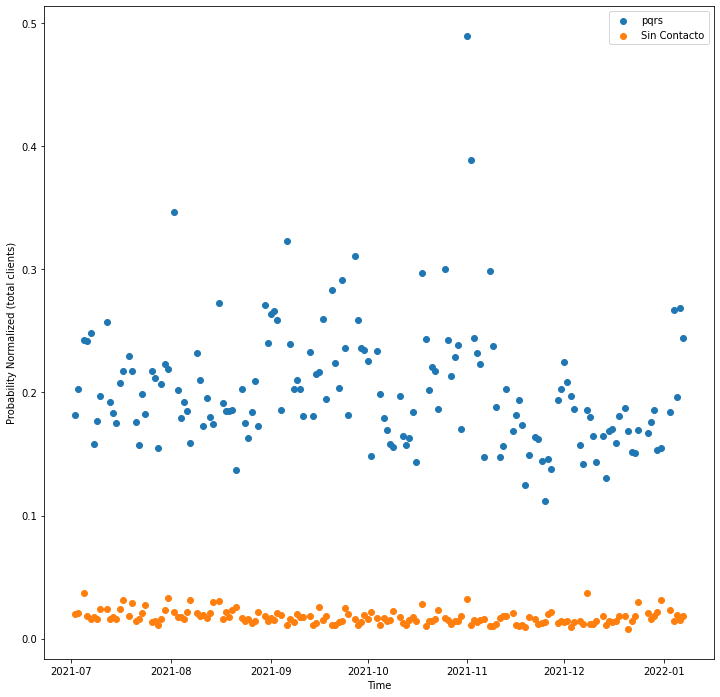

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(relations['close_date'], relations['clients_pqrs'], label='pqrs')
ax.scatter(relations['close_date'], relations['pqrs_sc'], label='Sin Contacto')
ax.set_xlabel('Time')
ax.set_ylabel('Probability Normalized (total clients)')
ax.legend()

In [68]:
IR = relations['pqrs_sc'].quantile(0.75) - relations['pqrs_sc'].quantile(0.25)
LS = relations['pqrs_sc'].quantile(0.75) + 1.5 * IR
LI = relations['pqrs_sc'].quantile(0.25) - 1.5 * IR

In [103]:
from sklearn.linear_model import LinearRegression
test = relations[['close_date', 'pqrs_sc']].dropna().reset_index()

X = test.index.values.reshape(-1,1)
Y = test['pqrs_sc'].values.astype('float64').reshape(-1,1)
reg = LinearRegression().fit(X,Y)

In [105]:
print(reg.score(X,Y), reg.coef_, reg.intercept_)

0.07064090959797664 [[-3.19253733e-05]] [0.02007104]


Text(0, 0.5, 'Probability Normalized (total clients)')

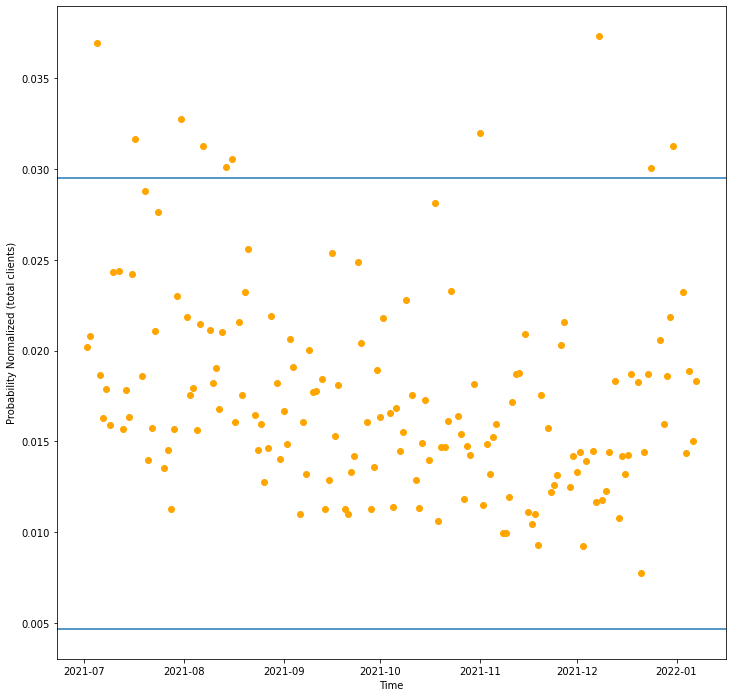

In [88]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(relations['close_date'], relations['pqrs_sc'], color='orange', label='Sin Contact')
plt.axhline([LS])
plt.axhline([LI])
ax.set_xlabel('Time')
ax.set_ylabel('Probability Normalized (total clients)')

Text(0, 0.5, 'Probability Normalized (total clients)')

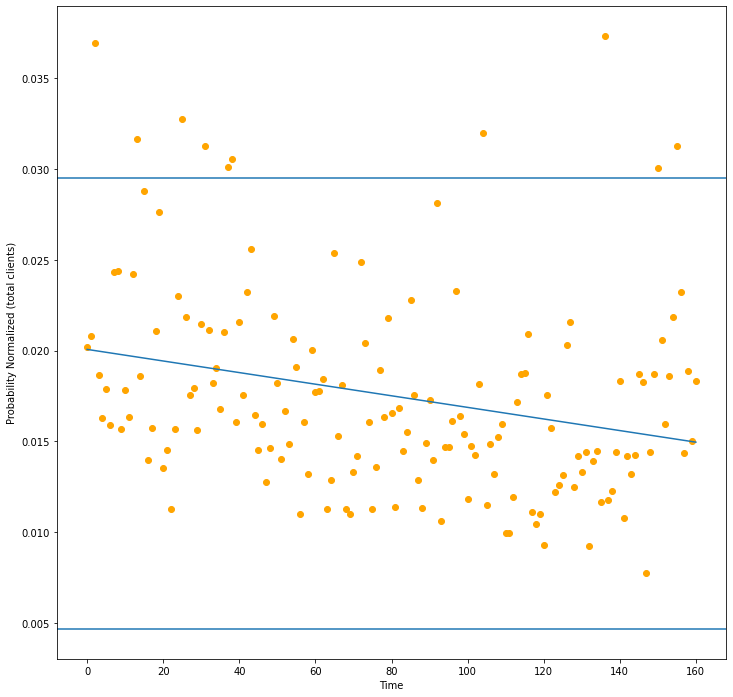

In [107]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(X, Y, color='orange', label='Sin Contact')
plt.axhline([LS])
plt.axhline([LI])
ax.plot(X, reg.predict(X))
ax.set_xlabel('Time')
ax.set_ylabel('Probability Normalized (total clients)')

Text(0, 0.5, 'Probability Normalized (total clients)')

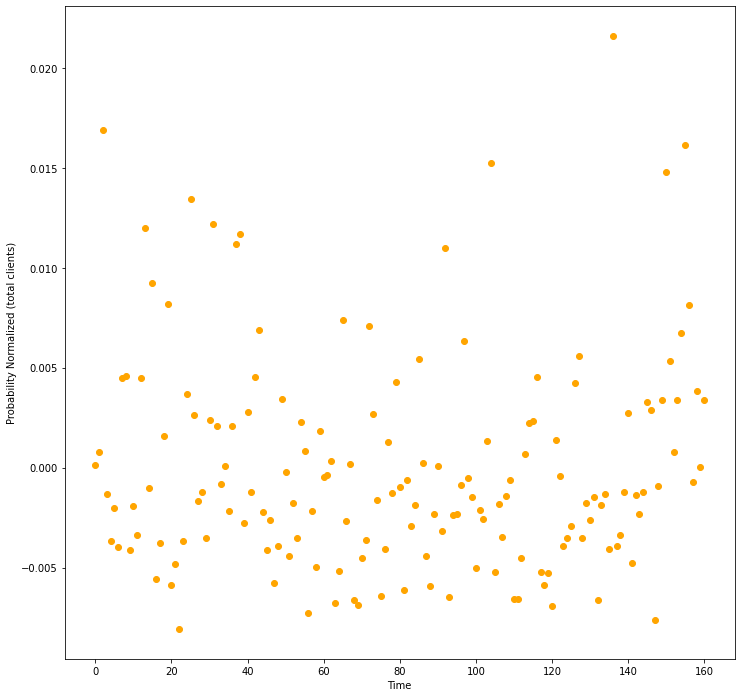

In [193]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(X, Y - reg.predict(X), color='orange', label='Sin Contact')
ax.set_xlabel('Time')
ax.set_ylabel('Probability Normalized (total clients)')

## Weekly

In [21]:
weekly_data = pd.pivot_table(data[data['name']=='Sin Contacto'], values='tag_name', index=['close_date'], columns=[data['close_date'].dt.weekday], aggfunc=pd.Series.nunique).reset_index()
weekly_data

close_date,close_date,0,1,2,3,4,5
0,2021-05-01,NaN,NaN,NaN,NaN,NaN,59.0
1,2021-05-03,9.0,NaN,NaN,NaN,NaN,NaN
2,2021-05-04,NaN,20.0,NaN,NaN,NaN,NaN
3,2021-05-05,NaN,NaN,15.0,NaN,NaN,NaN
4,2021-05-06,NaN,NaN,NaN,22.0,NaN,NaN
...,...,...,...,...,...,...,...
210,2022-01-04,NaN,28.0,NaN,NaN,NaN,NaN
211,2022-01-05,NaN,NaN,34.0,NaN,NaN,NaN
212,2022-01-06,NaN,NaN,NaN,31.0,NaN,NaN
213,2022-01-07,NaN,NaN,NaN,NaN,40.0,NaN


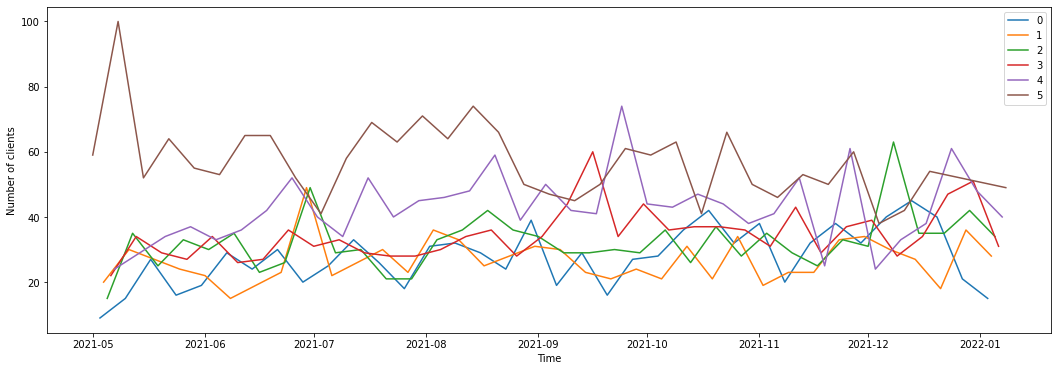

In [22]:
fig, ax = plt.subplots(figsize=(18,6))
for col in range(6):
    plot_data = weekly_data.loc[:,['close_date',col]].dropna()
    ax.plot(plot_data.loc[:,'close_date'], plot_data.loc[:,col],  label=col)

ax.set_xlabel('Time')
ax.set_ylabel('Number of clients')
ax.legend()

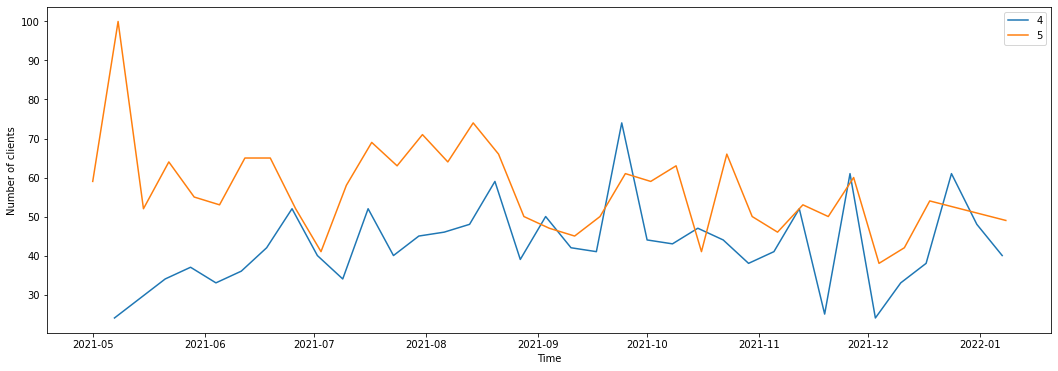

In [23]:
fig, ax = plt.subplots(figsize=(18,6))
for col in range(4,6):
    plot_data = weekly_data.loc[:,['close_date',col]].dropna()
    ax.plot(plot_data.loc[:,'close_date'], plot_data.loc[:,col],  label=col)

ax.set_xlabel('Time')
ax.set_ylabel('Number of clients')
ax.legend()

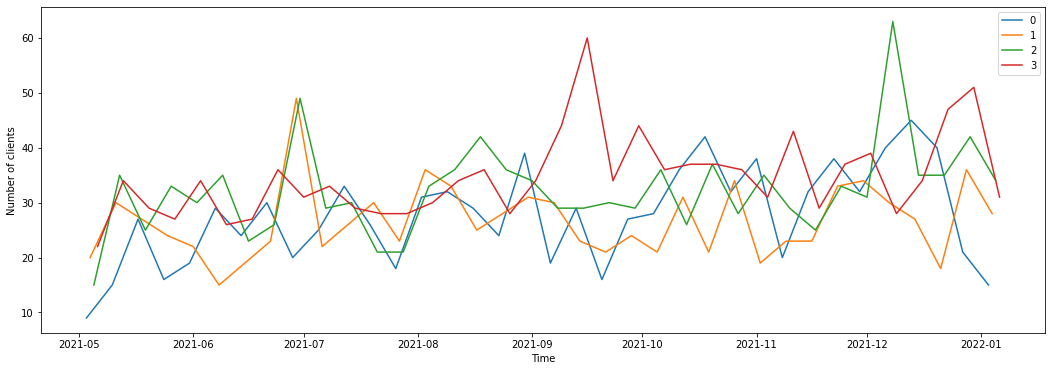

In [24]:
fig, ax = plt.subplots(figsize=(18,6))
for col in range(4):
    plot_data = weekly_data.loc[:,['close_date',col]].dropna()
    ax.plot(plot_data.loc[:,'close_date'], plot_data.loc[:,col],  label=col)

ax.set_xlabel('Time')
ax.set_ylabel('Number of clients')
ax.legend()

In [25]:
#Adjust weekday and  hour 
data.loc[:, 'day_check_in'] = data.loc[:,'check_in'].dt.weekday
data.loc[:, 'hours_check_in'] = data.loc[:,'check_in'].dt.hour
#


In [26]:
revenue_df.loc[:,'day_check_in'] = revenue_df.loc[:, 'check_in'].dt.weekday
revenue_df.loc[:,'hours_check_in'] = revenue_df.loc[:, 'check_in'].dt.hour

In [27]:
data[data['name']=='Sin Contacto'].columns

Index(['pqr_id', 'order_id', 'user_id', 'product_id', 'product_name', 'name',
       'detail_name', 'tracking_code', 'created_at', 'updated_at',
       'close_date', 'tag_name', 'tracking_code_order_group', 'status_pqr',
       'tracking_code1', 'stop_id', 'driver_id', 'timezonequery', 'latitude',
       'longitude', 'check_in_latitude', 'check_in_longitude',
       'check_out_latitude', 'check_out_longitude', 'check_in_original',
       'check_out_original', 'service_time', 'delivery_date', 'check_in',
       'check_out', 'checkin', 'checkout', 'day_check_in', 'hours_check_in'],
      dtype='object')

In [28]:
data_sc = data[data['name']=='Sin Contacto']
#data_sc.loc[:, 'day_check_in'] = data_sc.loc[:,'check_in'].dt.weekday
#data_sc.loc[:, 'hours_check_in'] = data_sc.loc[:,'check_in'].dt.hour

In [29]:
data_sc.head(15)

,pqr_id,order_id,user_id,product_id,product_name,name,detail_name,tracking_code,created_at,updated_at,...,check_in_original,check_out_original,service_time,delivery_date,check_in,check_out,checkin,checkout,day_check_in,hours_check_in
7,525666,2371222,TOErQ8sDDNapLNqpPYi0rBkLCxy2,NaN,NaN,Sin Contacto,NaN,95320060_27996751300568,2022-01-08 11:50,NaN,...,2022-01-08 10:52:00,NaN,NaN,2022-01-08,2022-01-08 05:52:00,NaN,05:52,NaN,5.0,5.0
10,525668,2377597,TOErQ8sDDNapLNqpPYi0rBkLCxy2,NaN,NaN,Sin Contacto,NaN,69575936_83468134734956,2022-01-08 11:56,NaN,...,2022-01-08 10:46:00,NaN,NaN,2022-01-08,2022-01-08 05:46:00,NaN,05:46,NaN,5.0,5.0
21,525719,2379313,zjHkPrKwifTLyyKLgl84sAAbWRN2,NaN,NaN,Sin Contacto,NaN,37471243_39920457402793,2022-01-08 12:55,NaN,...,2022-01-08 12:32:00,NaN,NaN,2022-01-08,2022-01-08 07:32:00,NaN,07:32,NaN,5.0,7.0
27,525804,2377499,INvc83E059YGUArQlhqCDBkWgRQ2,NaN,NaN,Sin Contacto,NaN,65042193_48102390509139,2022-01-08 13:29,NaN,...,2022-01-08 13:17:00,NaN,NaN,2022-01-08,2022-01-08 08:17:00,NaN,08:17,NaN,5.0,8.0
34,525840,2378756,b5D3dvX2ATemZ7WMOphyslSN0CR2,NaN,NaN,Sin Contacto,NaN,10392610_10577931715667,2022-01-08 14:00,NaN,...,2022-01-08 13:42:00,NaN,NaN,2022-01-08,2022-01-08 08:42:00,NaN,08:42,NaN,5.0,8.0
38,525863,2380595,INvc83E059YGUArQlhqCDBkWgRQ2,NaN,NaN,Sin Contacto,NaN,48562241_30246805641228,2022-01-08 14:14,NaN,...,2022-01-08 13:48:00,NaN,NaN,2022-01-08,2022-01-08 08:48:00,NaN,08:48,NaN,5.0,8.0
39,525828,2373644,INvc83E059YGUArQlhqCDBkWgRQ2,NaN,NaN,Sin Contacto,NaN,59322553_7667998764146,2022-01-08 13:50,NaN,...,2022-01-08 13:34:00,NaN,NaN,2022-01-08,2022-01-08 08:34:00,NaN,08:34,NaN,5.0,8.0
41,525827,2374358,vFY5ZORVRWO6lnq7gz2hRsZqvrj2,NaN,NaN,Sin Contacto,NaN,19341632_4879494194393,2022-01-08 13:50,NaN,...,2022-01-08 13:33:00,NaN,NaN,2022-01-08,2022-01-08 08:33:00,NaN,08:33,NaN,5.0,8.0
43,525839,2381349,6z5rlxHr1lcDkuGXm2vEM37MISm2,NaN,NaN,Sin Contacto,NaN,95381037_63801283863846,2022-01-08 13:58,NaN,...,2022-01-08 13:39:00,NaN,NaN,2022-01-08,2022-01-08 08:39:00,NaN,08:39,NaN,5.0,8.0
46,525808,2377680,6z5rlxHr1lcDkuGXm2vEM37MISm2,NaN,NaN,Sin Contacto,NaN,31361284_85455511752449,2022-01-08 13:35,2022-01-08 14:19,...,2022-01-08 13:18:00,NaN,NaN,2022-01-08,2022-01-08 08:18:00,NaN,08:18,NaN,5.0,8.0


In [30]:
day_hour_sc = pd.pivot_table(data_sc[data_sc['close_date'] > '2021-07-02'], values='tag_name', index=['hours_check_in'], columns=['day_check_in'], aggfunc=pd.Series.count)
day_hour_sc.style.background_gradient(cmap='Blues')

day_check_in,0.0,1.0,2.0,3.0,4.0,5.0
hours_check_in,,,,,,
4.0,nan,1.000000,nan,nan,nan,nan
5.0,6.000000,4.000000,5.000000,8.000000,9.000000,7.000000
6.0,31.000000,29.000000,48.000000,36.000000,37.000000,34.000000
7.0,83.000000,55.000000,68.000000,60.000000,76.000000,111.000000
8.0,115.000000,91.000000,126.000000,144.000000,139.000000,183.000000
9.0,139.000000,92.000000,139.000000,140.000000,183.000000,164.000000
10.0,126.000000,107.000000,137.000000,124.000000,182.000000,203.000000
11.0,99.000000,91.000000,121.000000,117.000000,159.000000,169.000000
12.0,96.000000,80.000000,88.000000,111.000000,139.000000,170.000000


In [31]:
day_hour_pqr = pd.pivot_table(data[data['close_date']>'2021-07-02'], values='tag_name', index=['hours_check_in'], columns=['day_check_in'], aggfunc=pd.Series.count)
day_hour_pqr.style.background_gradient(cmap='Blues')

day_check_in,0.0,1.0,2.0,3.0,4.0,5.0
hours_check_in,,,,,,
3.0,nan,1.000000,nan,nan,nan,1.000000
4.0,2.000000,1.000000,2.000000,nan,1.000000,nan
5.0,24.000000,30.000000,23.000000,45.000000,33.000000,26.000000
6.0,183.000000,192.000000,228.000000,212.000000,202.000000,194.000000
7.0,594.000000,690.000000,640.000000,704.000000,677.000000,780.000000
8.0,1259.000000,1444.000000,1473.000000,1564.000000,1633.000000,1482.000000
9.0,2072.000000,2149.000000,2105.000000,2334.000000,2218.000000,2241.000000
10.0,2117.000000,2305.000000,2251.000000,2303.000000,2510.000000,2421.000000
11.0,1957.000000,2368.000000,2090.000000,2241.000000,2364.000000,2325.000000


In [32]:
clients_hour = pd.pivot_table(revenue_df, values='tag_name', index=['hours_check_in'], columns=['day_check_in'], aggfunc=pd.Series.count)
clients_hour.style.background_gradient(cmap='Blues')

day_check_in,0.0,1.0,2.0,3.0,4.0,5.0
hours_check_in,,,,,,
3.0,nan,nan,1.000000,nan,nan,nan
4.0,5.000000,4.000000,7.000000,5.000000,4.000000,5.000000
5.0,149.000000,174.000000,188.000000,170.000000,146.000000,95.000000
6.0,1057.000000,1226.000000,1301.000000,1235.000000,1057.000000,1014.000000
7.0,3045.000000,3892.000000,3953.000000,4135.000000,3901.000000,3973.000000
8.0,5989.000000,7300.000000,7829.000000,8291.000000,8843.000000,8160.000000
9.0,8208.000000,9750.000000,10369.000000,11298.000000,12294.000000,11016.000000
10.0,8609.000000,10371.000000,10763.000000,11751.000000,12890.000000,11690.000000
11.0,7928.000000,9344.000000,9737.000000,10512.000000,11728.000000,10808.000000


#### Normalized 

In [33]:
(day_hour_sc/day_hour_pqr).style.background_gradient(cmap='Blues')

day_check_in,0.0,1.0,2.0,3.0,4.0,5.0
hours_check_in,,,,,,
3.0,nan,nan,nan,nan,nan,nan
4.0,nan,1.000000,nan,nan,nan,nan
5.0,0.250000,0.133333,0.217391,0.177778,0.272727,0.269231
6.0,0.169399,0.151042,0.210526,0.169811,0.183168,0.175258
7.0,0.139731,0.079710,0.106250,0.085227,0.112260,0.142308
8.0,0.091342,0.063019,0.085540,0.092072,0.085119,0.123482
9.0,0.067085,0.042811,0.066033,0.059983,0.082507,0.073182
10.0,0.059518,0.046421,0.060862,0.053843,0.072510,0.083850
11.0,0.050588,0.038429,0.057895,0.052209,0.067259,0.072688


In [34]:
(day_hour_pqr/clients_hour).style.background_gradient(cmap='Blues')

day_check_in,0.0,1.0,2.0,3.0,4.0,5.0
hours_check_in,,,,,,
3.0,nan,nan,nan,nan,nan,nan
4.0,0.400000,0.250000,0.285714,nan,0.250000,nan
5.0,0.161074,0.172414,0.122340,0.264706,0.226027,0.273684
6.0,0.173132,0.156607,0.175250,0.171660,0.191107,0.191321
7.0,0.195074,0.177287,0.161902,0.170254,0.173545,0.196325
8.0,0.210219,0.197808,0.188147,0.188638,0.184666,0.181618
9.0,0.252437,0.220410,0.203009,0.206585,0.180413,0.203431
10.0,0.245905,0.222254,0.209142,0.195983,0.194725,0.207100
11.0,0.246847,0.253425,0.214645,0.213185,0.201569,0.215118


In [35]:
(day_hour_sc/clients_hour).style.background_gradient(cmap='Blues')

day_check_in,0.0,1.0,2.0,3.0,4.0,5.0
hours_check_in,,,,,,
3.0,nan,nan,nan,nan,nan,nan
4.0,nan,0.250000,nan,nan,nan,nan
5.0,0.040268,0.022989,0.026596,0.047059,0.061644,0.073684
6.0,0.029328,0.023654,0.036895,0.029150,0.035005,0.033531
7.0,0.027258,0.014132,0.017202,0.014510,0.019482,0.027939
8.0,0.019202,0.012466,0.016094,0.017368,0.015719,0.022426
9.0,0.016935,0.009436,0.013405,0.012392,0.014885,0.014887
10.0,0.014636,0.010317,0.012729,0.010552,0.014119,0.017365
11.0,0.012487,0.009739,0.012427,0.011130,0.013557,0.015637


## Conditional approach

In [36]:
data_conditional = data.groupby(['tag_name','close_date','name'])['name'].count()
data_conditional = data_conditional.rename_axis(index={'name':'name_type'})
data_conditional = data_conditional.reset_index()
data_conditional = data_conditional.groupby(['tag_name'])['name_type'].apply(list)

In [37]:
prob = {}
for row in data_conditional:
    if len(row)>1:
        for i in range(len(row) - 1):
            if row[i+1] == 'Sin Contacto':
                if (row[i], row[i+1]) in prob:
                    prob[(row[i], row[i+1])] +=1
                else:
                    prob[(row[i], row[i+1])] = 1     

In [38]:
counter = pd.DataFrame(prob.items(), columns=['n_gramas', 'count'])
counter = counter.sort_values(by=['count'], ascending=False)
counter

,n_gramas,count
0,"(Faltante total, Sin Contacto)",945
5,"(Sin Contacto, Sin Contacto)",920
7,"(Faltante parcial, Sin Contacto)",459
13,"(Cliente no necesita el producto, Sin Contacto)",439
4,"(Cancelación por Cliente, Sin Contacto)",301
21,"(No tiene dinero, Sin Contacto)",236
11,"(Fuera de Slot, Sin Contacto)",189
16,"(Atención del conductor, Sin Contacto)",151
14,"(Atención del hunter, Sin Contacto)",140
15,"(Calidad Sanidad, Sin Contacto)",137


In [39]:
#resume[['name', 'tag_name']]
#counter.apply(lambda x: print(resume[resume['name']==x['n_gramas'][0]]['tag_name']), axis=1)
counter ['ticket'] = counter['n_gramas'].apply(lambda x: x[0])
counter = counter.merge(resume[['name','tag_name']], left_on = 'ticket', right_on = 'name', how = 'left')
counter = counter[['n_gramas', 'count', 'tag_name']]
counter['cond_prob'] = counter['count'] / counter['tag_name']
counter = counter.sort_values(by=['cond_prob'], ascending=False)

In [40]:
counter

,n_gramas,count,tag_name,cond_prob
29,"(Reducción por Retención, Sin Contacto)",9,35,0.257143
1,"(Sin Contacto, Sin Contacto)",920,6021,0.152799
5,"(No tiene dinero, Sin Contacto)",236,1639,0.143990
14,"(Local Cerrado, Sin Contacto)",75,674,0.111276
19,"(Atención SAC, Sin Contacto)",43,427,0.100703
6,"(Fuera de Slot, Sin Contacto)",189,1954,0.096725
26,"(Problemas con descuentos, Sin Contacto)",15,161,0.093168
25,"(Facturación (Marketplace), Sin Contacto)",17,187,0.090909
24,"(Problemas con precios, Sin Contacto)",24,312,0.076923
20,"(Zona peligrosa/difícil acceso, Sin Contacto)",34,444,0.076577


C:\Users\User\AppData\Local\Temp/ipykernel_20472/428825677.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counter['n_gramas'].astype(str), rotation = 90)


[Text(0, 0, "('Reducción por Retención', 'Sin Contacto')"),
 Text(1, 0, "('Sin Contacto', 'Sin Contacto')"),
 Text(2, 0, "('No tiene dinero', 'Sin Contacto')"),
 Text(3, 0, "('Local Cerrado', 'Sin Contacto')"),
 Text(4, 0, "('Atención SAC', 'Sin Contacto')"),
 Text(5, 0, "('Fuera de Slot', 'Sin Contacto')"),
 Text(6, 0, "('Problemas con descuentos', 'Sin Contacto')"),
 Text(7, 0, "('Facturación (Marketplace)', 'Sin Contacto')"),
 Text(8, 0, "('Problemas con precios', 'Sin Contacto')"),
 Text(9, 0, "('Zona peligrosa/difícil acceso', 'Sin Contacto')"),
 Text(10, 0, "('Cliente no hace pedido', 'Sin Contacto')"),
 Text(11, 0, "('Hora de llegada', 'Sin Contacto')"),
 Text(12, 0, "('Cliente no necesita el producto', 'Sin Contacto')"),
 Text(13, 0, "('Faltante total', 'Sin Contacto')"),
 Text(14, 0, "('Cancelación por Cliente', 'Sin Contacto')"),
 Text(15, 0, "('Problema con precios', 'Sin Contacto')"),
 Text(16, 0, "('Problemas con la dirección', 'Sin Contacto')"),
 Text(17, 0, "('Atención d

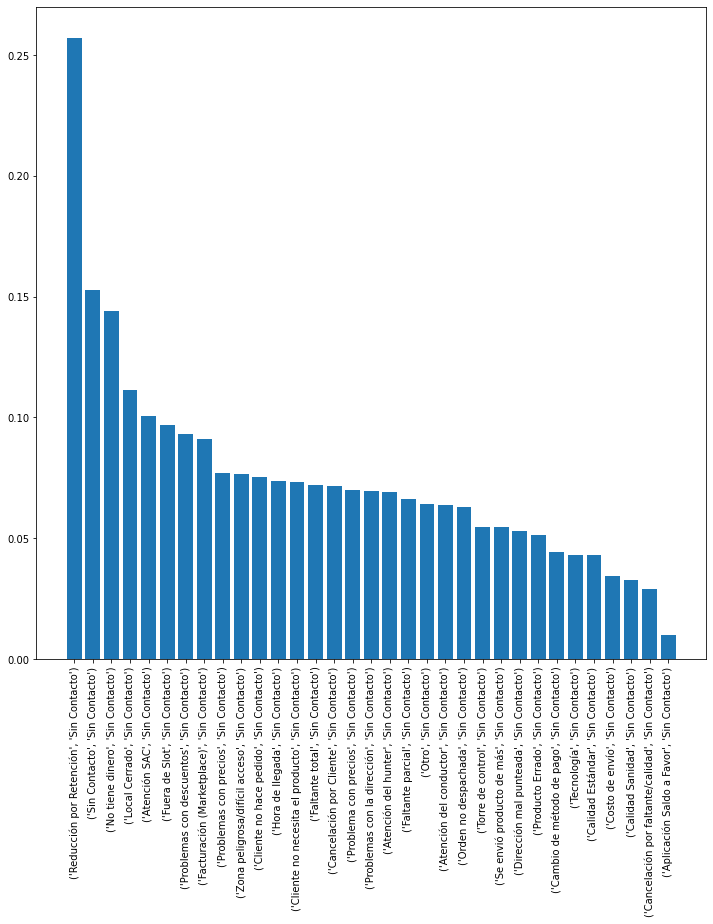

In [41]:
fig, ax  = plt.subplots(figsize=(12,12))
ax.bar(counter['n_gramas'].astype(str), counter['cond_prob'])
ax.set_xticklabels(counter['n_gramas'].astype(str), rotation = 90)

In [42]:
map_data_pqr = data.loc[:,['check_in_latitude','check_out_longitude', 'name']]
map_data_sc = map_data_pqr[map_data_pqr['name']=='Sin Contacto']
map_data_sc = map_data_sc.dropna()
#
map_clients = revenue_df.loc[:,['check_in_latitude','check_out_longitude']]
map_clients = map_clients.dropna()

In [43]:
map_data_sc.loc[:,'color'] = map_data_sc[['check_in_latitude','check_out_longitude', 'name']].apply(lambda x: 'red' if x['name'] in ['Sin Contacto'] else 'blue', axis=1)      #

In [44]:
geo_sc = list(map_data_sc.apply(lambda x :[ (x['check_in_latitude'], x['check_out_longitude']), x['color']], axis=1))
geo_clients = list(map_clients.apply(lambda x: [x['check_in_latitude'], x['check_out_longitude']], axis=1))

In [45]:
m = Map(center=(4.65, -74.1), zoom=11)

heatmap = Heatmap(
    locations=[list(row[0]) for row in geo_sc],
    radius=20
)

m.add_layer(heatmap);

m

Map(center=[4.65, -74.1], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [46]:
m = Map(center=(4.65, -74.1), zoom=11)

heatmap = Heatmap(
    locations=geo_clients,
    radius=8
)

m.add_layer(heatmap);

m

Map(center=[4.65, -74.1], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [47]:
data[(data['name']=='Sin Contacto') & (data['close_date']>'2021-10')].groupby(['tag_name'])['tag_name'].count().sort_values(ascending=False)

tag_name
granT2                     13
maxdiagonal98              12
micarrera9                 10
restaurantecarrera92T16     9
fantasiacarrera112bis       8
                           ..
lacalle75aT1                1
lacalle73surT4              1
lacalle70surT4              1
lacalle70aT3                1
zonacarrera28bT2            1
Name: tag_name, Length: 2617, dtype: int64

In [122]:
top_sc_clients = data[data['name'] == 'Sin Contacto'].groupby(['close_date', 'tag_name'])['tag_name'].nunique().groupby('tag_name').sum().sort_values(ascending=False)

In [191]:
top_sc_clients

tag_name
granT2                       33
supercarrera15               16
pizzarratransversal76bsur    15
sandwichcalle64i             11
micarrera9                   10
                             ..
jose95                        1
jorgecarrera58T1              1
jorgecarrera110               1
johncalle54sur                1
zulmipancalle69csur           1
Name: tag_name, Length: 6021, dtype: int64

In [175]:
aux = []
for val in range(5):
    aux.append(top_sc_clients[top_sc_clients > val].count())

In [192]:
aux

[6021, 1229, 360, 138, 49]

[Text(0, 0, '1'),
 Text(0, 0, '0.204119'),
 Text(0, 0, '0.0597907'),
 Text(0, 0, '0.0229198'),
 Text(0, 0, '0.00813818')]

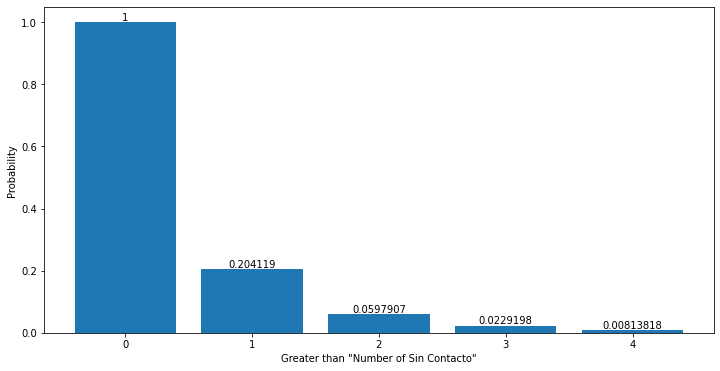

In [190]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(len(aux)), aux/max(aux))
ax.set_ylabel('Probability')
ax.set_xlabel('Greater than "Number of Sin Contacto"')
ax.bar_label(ax.containers[0])

In [48]:
data[(data['tag_name'] == 'granT2') & (data['name']=='Sin Contacto') & (data['close_date']>'2021-10') ]

,pqr_id,order_id,user_id,product_id,product_name,name,detail_name,tracking_code,created_at,updated_at,...,check_in_original,check_out_original,service_time,delivery_date,check_in,check_out,checkin,checkout,day_check_in,hours_check_in
1095,525380,2377062,1DKUIMDI18c7hfMQB49ZHu5MluA2,NaN,NaN,Sin Contacto,NaN,-244821_21915291503906,2022-01-07 17:08,NaN,...,2022-01-07 16:52:00,NaN,NaN,2022-01-07,2022-01-07 11:52:00,NaN,11:52,NaN,4.0,11.0
4408,520716,2351126,cQElAWUVjleX5ApXioMt3mj9lHh1,NaN,NaN,Sin Contacto,NaN,-244821_379104799849675,2021-12-30 18:23,NaN,...,2021-12-30 18:06:00,NaN,NaN,2021-12-30,2021-12-30 13:06:00,NaN,13:06,NaN,3.0,13.0
19759,499657,2218370,M9g0b4P01ScY82xkzGWS2PJT4LE2,NaN,NaN,Sin Contacto,NaN,-244821_2282277135820,2021-11-30 19:45,2021-11-30 19:45,...,2021-11-30 19:37:00,NaN,NaN,2021-11-30,2021-11-30 14:37:00,NaN,14:37,NaN,1.0,14.0
20904,497627,2217970,6MEX2IGveQa1l4OmjhP2ksW7BMU2,NaN,NaN,Sin Contacto,NaN,-244821_603028931788,2021-11-27 17:08,2021-11-27 17:08,...,2021-11-27 16:08:00,NaN,NaN,2021-11-27,2021-11-27 11:08:00,NaN,11:08,NaN,5.0,11.0
27460,488991,2159321,fOUlI8qoM4Ovk16tUDuUL3Yhsuv2,NaN,NaN,Sin Contacto,NaN,-244821_182406568251316,2021-11-15 17:17,2021-11-15 17:17,...,2021-11-15 17:06:00,NaN,NaN,2021-11-15,2021-11-15 12:06:00,NaN,12:06,NaN,0.0,12.0
34863,479269,2108798,0LDE7KhaONQfQj0a1yuzyNjrjU52,NaN,NaN,Sin Contacto,NaN,-244821_87258231112794,2021-11-03 18:57,2021-11-03 18:57,...,2021-11-03 18:42:00,NaN,NaN,2021-11-03,2021-11-03 13:42:00,NaN,13:42,NaN,2.0,13.0
39762,473242,2082810,e567vF3no5X1CQqu9f1axYg0W393,NaN,NaN,Sin Contacto,NaN,-244821_15118137631740,2021-10-27 19:33,2021-10-27 19:33,...,2021-10-27 19:23:00,NaN,NaN,2021-10-27,2021-10-27 14:23:00,NaN,14:23,NaN,2.0,14.0
40489,472390,2076237,bKzUjeh7oFeSo89TYiUgyR8SWQm2,NaN,NaN,Sin Contacto,NaN,-244821_216617818686188,2021-10-26 19:54,2021-10-26 19:54,...,2021-10-26 19:42:00,NaN,NaN,2021-10-26,2021-10-26 14:42:00,NaN,14:42,NaN,1.0,14.0
46185,464654,2038294,ra4eJdb1HvN89cIQMXlCv1U1oyv2,NaN,NaN,Sin Contacto,NaN,-244821_38366844348837,2021-10-16 19:28,2021-10-16 19:28,...,2021-10-16 19:10:00,NaN,NaN,2021-10-16,2021-10-16 14:10:00,NaN,14:10,NaN,5.0,14.0
47731,462630,2029523,ra4eJdb1HvN89cIQMXlCv1U1oyv2,NaN,NaN,Sin Contacto,NaN,-244821_14918361538181,2021-10-14 18:10,2021-10-14 18:10,...,2021-10-14 17:57:00,NaN,NaN,2021-10-14,2021-10-14 12:57:00,NaN,12:57,NaN,3.0,12.0


In [49]:
data[data['name']=='Sin Contacto']['service_time'].describe()

count     1354.000000
mean        96.251108
std       1194.858198
min          0.000000
25%          9.000000
50%         23.000000
75%         45.000000
max      28221.000000
Name: service_time, dtype: float64

In [50]:
serviceTime_sc = data[data['name']=='Sin Contacto']['service_time'].dropna()

In [51]:
sc_q3 = serviceTime_sc.quantile(0.75)
sc_q1 = serviceTime_sc.quantile(0.25)
iqr =  sc_q3 - sc_q1
LS = sc_q3 + 1.5*iqr
LI= sc_q1 - 1.5*iqr

In [52]:
serviceTime_sc = serviceTime_sc[(serviceTime_sc >LI)&(serviceTime_sc < LS)]

In [53]:
serviceTime_sc.describe()

count    1231.000000
mean       25.261576
std        22.135646
min         0.000000
25%         8.000000
50%        20.000000
75%        36.000000
max        98.000000
Name: service_time, dtype: float64

(array([343., 248., 227., 152.,  72.,  71.,  43.,  30.,  24.,  21.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <BarContainer object of 10 artists>)

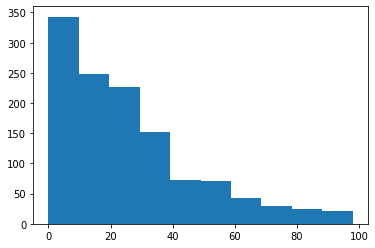

In [54]:
fig, ax = plt.subplots()
ax.hist(serviceTime_sc, bins=10)

In [55]:
data[data['name']!='Sin Contacto']['service_time'].describe()

count     74234.000000
mean         79.992537
std        1875.142013
min           0.000000
25%           4.000000
50%          12.000000
75%          27.000000
max      143896.000000
Name: service_time, dtype: float64

In [56]:
serviceTime_pqr = data[data['name']!='Sin Contacto']['service_time'].dropna()

In [57]:
sc_q3 = serviceTime_pqr.quantile(0.75)
sc_q1 = serviceTime_pqr.quantile(0.25)
iqr =  sc_q3 - sc_q1
LS = sc_q3 + 1.5*iqr
LI= sc_q1 - 1.5*iqr

In [58]:
serviceTime_pqr = serviceTime_pqr[(serviceTime_pqr >LI)&(serviceTime_pqr < LS)]

(array([15846.,  5051.,  4912.,  4451.,  4242.,  3895.,  3603.,  3048.,
         2786.,  2272.,  2210.,  1752.,  1539.,  1445.,  1315.,  1156.,
         1012.,   925.,   847.,   697.,   606.,   672.,   579.,   482.,
          472.,   479.,   385.,   304.,   329.,   487.]),
 array([ 0.        ,  2.03333333,  4.06666667,  6.1       ,  8.13333333,
        10.16666667, 12.2       , 14.23333333, 16.26666667, 18.3       ,
        20.33333333, 22.36666667, 24.4       , 26.43333333, 28.46666667,
        30.5       , 32.53333333, 34.56666667, 36.6       , 38.63333333,
        40.66666667, 42.7       , 44.73333333, 46.76666667, 48.8       ,
        50.83333333, 52.86666667, 54.9       , 56.93333333, 58.96666667,
        61.        ]),
 <BarContainer object of 30 artists>)

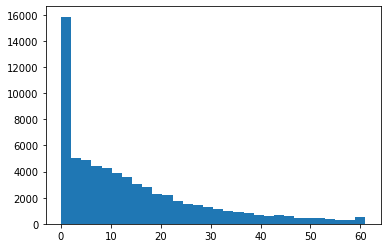

In [59]:
fig, ax = plt.subplots()
ax.hist(serviceTime_pqr, bins=30)

In [60]:
serviceTime_pqr.describe()

count    67799.000000
mean        14.354519
std         14.047772
min          0.000000
25%          3.000000
50%         10.000000
75%         21.000000
max         61.000000
Name: service_time, dtype: float64